# **Sales Dept Data analysis**

### ***Import the dataset and key libraries***

In [1]:
#Import key libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

#### 1. Import Sales train data and have a closer look at it

In [2]:
#Load the dataset- Sales train dataset
salestrain_df = pd.read_csv(r'C:\Users\ramsahu\Desktop\UDEMY Courses\Data Science for Business - 6 Real-world Case Studies\Section 4 Sales Department\3. Sales Department Data\train.csv')

#Check the head of the dataset
salestrain_df.head()

C:\Users\ramsahu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
#Check the shape of the data
salestrain_df.shape


#Notes:
#There are around a million rows of data in the train dataset

(1017209, 9)

In [4]:
#Check the summary of the dataset
salestrain_df.info()

#Notes
# 9 columns in total, 8 columns are features and 1 column (i.e. sales) is the target variable which we need to predict 
#There are no empty or null data points in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [5]:
#Check the average of the dataset
salestrain_df.describe()

#Notes: 
#Sales: Avg = 5,773 euros per day, min sales = 0, max sales = 41,551 euros per day
#Customers: Avg = 633 per day, min = 0, max = 7,388

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


#### 2. Import Store data and have a close look at the variables

In [6]:
#Load the store dataset
store_info_df = pd.read_csv(r"C:\Users\ramsahu\Desktop\UDEMY Courses\Data Science for Business - 6 Real-world Case Studies\Section 4 Sales Department\3. Sales Department Data\store.csv")

#Have a quick look at the head of the data
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [7]:
#Check the shape of the data
store_info_df.shape

#Notes:
#There are 1115 unique stores with 10 different features/variables

(1115, 10)

In [8]:
#Check the summary of the dataset
store_info_df.info()

#Notes:
#There are some blank/null values in the store dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
#Check the average of the dataset
store_info_df.describe()

#Notes:
# 1115 unique stores
# Competition distance: Avg = 5,404 meters, median = 2,325 mtrs, min = 20 mts, max=75,860 mts


,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## ***Explore the dataset (EDA)***

### 1. Explore sales training dataset

In [10]:
#Check for missing values
salestrain_df.info()

#Note: THere are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


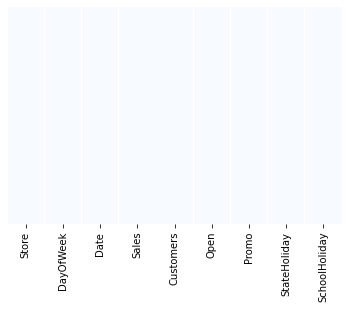

In [11]:
#Check for missing values by visualising the data points
sns.heatmap(salestrain_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')
#Note: There are no null or missing values in this dataset

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E036CCD60>,
      dtype=object)

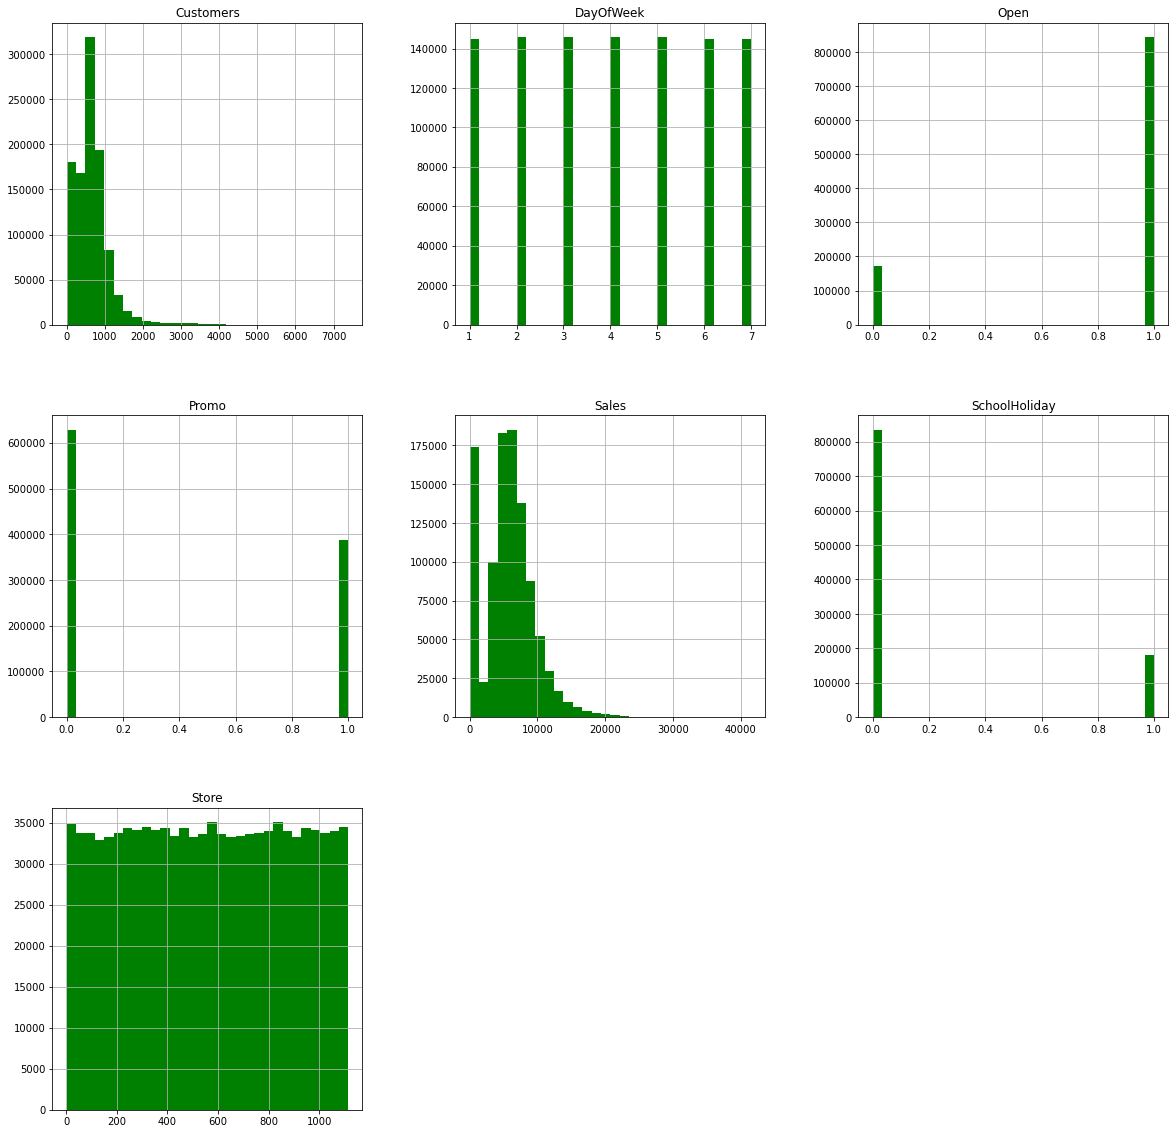

In [12]:
#Plot the histograms of the variables
salestrain_df.hist(bins=30, figsize=(20,20), color='g')

#Note:
#Avg of 600 customers per day. THere is an outlier at 7388 but it is not visible in the charts
#Sales data is distributed evenly across the weeks
#Stores are open 80% of the times
#Promos are on approx 60% (2/3rd) of the times
#Avg sales is around 5-6k euros
#School holidays is around 20% of the times
#Data is equally distributed across all the 1100+ stores. There is no bias.

In [13]:
#Check how many stores are open or closed
closed_stores_df = salestrain_df[salestrain_df['Open']==0]
open_stores_df = salestrain_df[salestrain_df['Open']==1]


In [14]:
#count the no of stores that are open or close
print('Total stores = ', len(salestrain_df['Open']))
print('No of closed stores = ', len(closed_stores_df['Open']))
print('No of open stores = ', len(open_stores_df['Open']))

Total stores =  1017209
No of closed stores =  172817
No of open stores =  844392


In [15]:
#Create a subset of the dataset by selecting only those stores which are open (because closed stores will have 0 customers)
salestrainopen_df = salestrain_df[salestrain_df['Open']==1]

#Check the shape of the new dataset
salestrainopen_df.shape

(844392, 9)

In [16]:
#Drop the Open column as it is of no use now
salestrainopen_df.drop(['Open'], axis = 1, inplace=True)


C:\Users\ramsahu\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
#Check if the Open column has been dropped or not
salestrainopen_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [18]:
#Check the description/summary of the new dataset
salestrainopen_df.describe()
#note: The avg sales is 6955 now (increased from 5773 earlier) 
#The avg no of customers per day is 762 (increased from 633 earlier)

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### 2. Explore store training dataset

In [19]:
#Let's see if we have any missing data in the store dataset
store_info_df.info()

#There are a lot of missing values in some variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


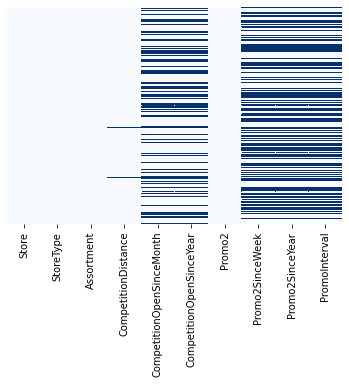

In [20]:
#Visualise the store data to see the missing values
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

#Note: Competition distance has the least missing values while other variables have a ton of missing values

In [21]:
#Have a look at the missing values of competition distance
store_info_df[store_info_df['CompetitionDistance'].isnull()]

#There are only three rows that have missing values for Competition Distance

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [22]:
#Have a look at the missing values of Competition open since month variable
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

#There are 354 missing values (1/3rd of 1115 stores) in competition open since month variable
#The same is true for Competition open since year column

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [23]:
#Check the promo 2 column. See what is happening when promo 2 is not running
store_info_df[store_info_df['Promo2']==0]

#Note:When Promo2 is off or '0' then there are NaN values for Promo2SinceWeek, Promo2SinceYear & Promointerval
#There are 544 rows of NaN data for these two variables
#So it's better to convert the NaN's to 0

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [24]:
#There are two approaches to fill the variables with 0. 

#1. The first method is select each column and replace the nan values to 0 (like shown below). 
#Repeat the below for all the other columns
store_info_df['Promo2SinceWeek'].fillna(0, inplace=True)

#2. The other method is to use a for loop to get this done with single line of code

#Select the columns that has Nan values that needs to be replaced with 0
store_nan_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

#Write a for loop to replace the nan values to 0 in each column
for cols in store_nan_cols:
    store_info_df[cols].fillna(0, inplace=True)
    
#Check the revised dataframe to see if all the NaN values have been replaced by 0
store_info_df.tail()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1114,1115,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


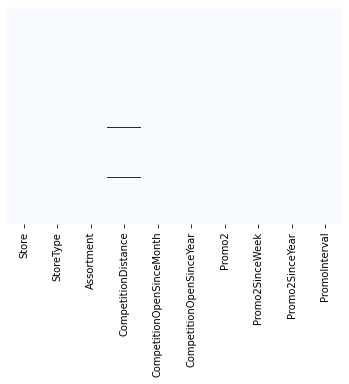

In [25]:
#Now check the store df to see if there are any more missing values using heatmap
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap = 'Blues')

#We can see that only the competiton distance has missing values

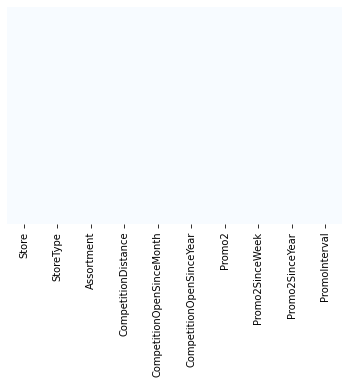

In [26]:
#As the competiton distance cannot be 0 and it is not true representation of the facts, we will impute the mean/avg values 
#of the competition distance column to fill the nan values
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

#Now plot the heatmap again to see if there are any missing info
sns.heatmap(store_info_df.isnull(), yticklabels=False, cbar=False, cmap = 'Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018E03E889D0>,
      dtype=object)

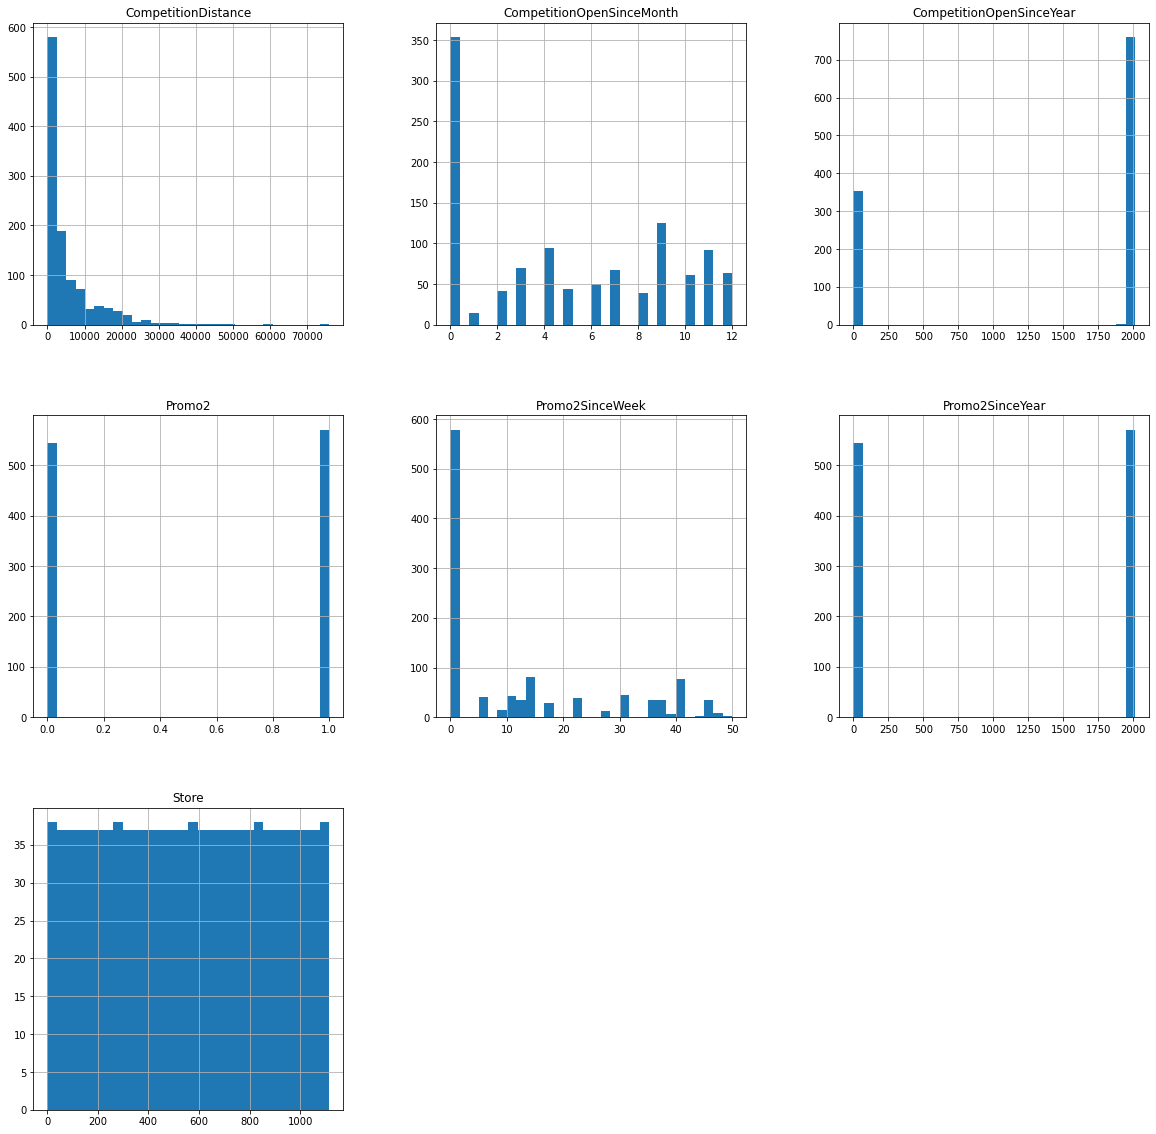

In [27]:
#Now plot the histogram for all the variables in the store info df
store_info_df.hist(bins=30, figsize=(20,20))

#Insight:
#Most of the stores are located within 0-3000m (0-3km) from competition
#Almost half of the stores are running promo2 in addition to promo 1

### 3. Merge both the datasets and explore the merged dataset

In [28]:
#Merge both the datasets by using merge function of pandas
sales_train_merged = pd.merge(salestrain_df, store_info_df, how='inner', on='Store')

#Inspect the merged dataset
sales_train_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [29]:
#Check the correlation between the variables and the sales (to be specific)
correlations = sales_train_merged.corr()['Sales'].sort_values()
correlations

#Insights:
#Customers and Open variables are highly correlated with sales followed by Promo
#Promo2 is negatively correlated with sales. Hence, we can say that promo2 is inffective


DayOfWeek                   -0.462125
Promo2SinceYear             -0.091056
Promo2                      -0.091040
Promo2SinceWeek             -0.044143
CompetitionDistance         -0.019207
CompetitionOpenSinceMonth   -0.012431
CompetitionOpenSinceYear     0.002749
Store                        0.005126
SchoolHoliday                0.085124
Promo                        0.452345
Open                         0.678472
Customers                    0.894711
Sales                        1.000000
Name: Sales, dtype: float64

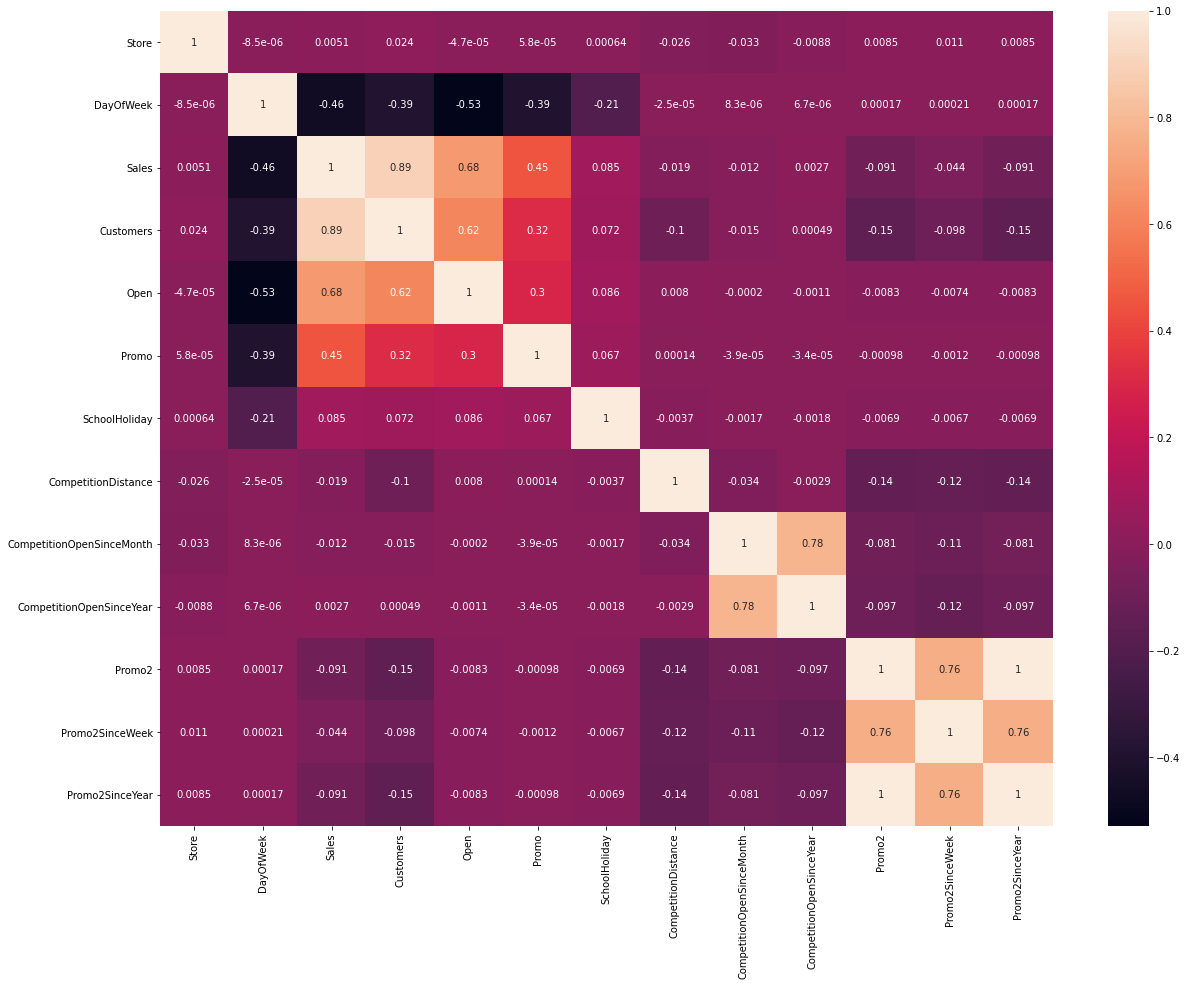

In [30]:
#Now visualise the correlation between all the variables using heatmap in one single view
correlations = sales_train_merged.corr()
f, ax = plt.subplots(figsize=(20,15))
sns.heatmap(correlations, annot=True)

#Insights
#As seen above there is a high correlation between sales and customer & Promo

In [31]:
#Now create separate columns for Year, Month and Days from the Date column which has all the data
sales_train_merged['year'] = pd.DatetimeIndex(sales_train_merged['Date']).year
sales_train_merged['month'] = pd.DatetimeIndex(sales_train_merged['Date']).month
sales_train_merged['day'] = pd.DatetimeIndex(sales_train_merged['Date']).day

#Check if the year, month and day have been extracted in separate columns
sales_train_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,1,0,1,c,...,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


Text(0.5, 1.0, 'Average sales per month')

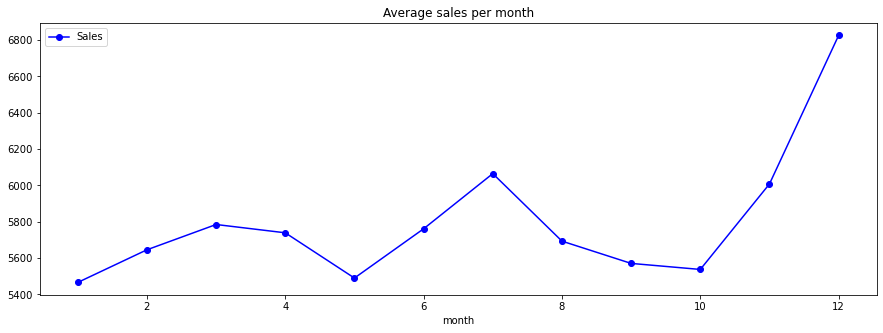

In [32]:
#Take a look at the average sales and no of customers per month
axis = sales_train_merged.groupby('month')[['Sales']].mean().plot(figsize=(15,5), marker='o', color = 'b')
axis.set_title('Average sales per month')

#Insight:
#Sales peak during the month of May-June-July and then drop; and then again peak from Oct-Nov-Dec

Text(0.5, 1.0, 'Average customers per month')

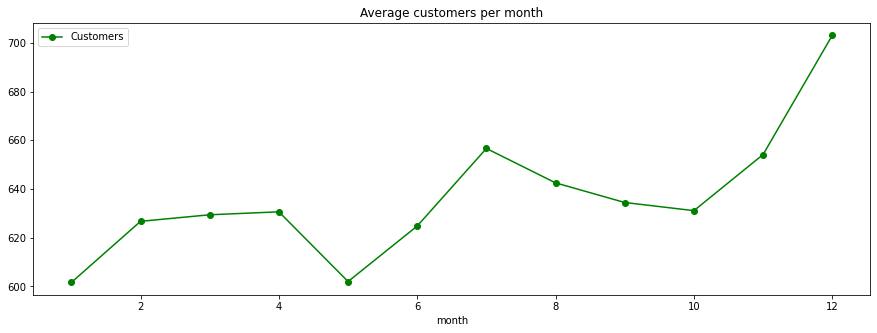

In [33]:
#Take a look at the average sales and no of customers per month
axis = sales_train_merged.groupby('month')[['Customers']].mean().plot(figsize=(15,5), marker='o', color = 'g')
axis.set_title('Average customers per month')

#Insight: Same trend as seen in the monthly sales

Text(0.5, 1.0, 'Average sales per day')

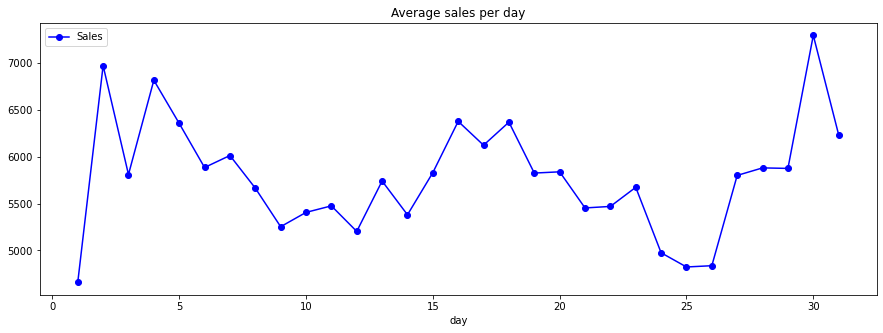

In [34]:
#Visualise the average sales and no of customers per day
axis = sales_train_merged.groupby('day')[['Sales']].mean().plot(figsize=(15,5), marker = 'o', color = 'b')
axis.set_title('Average sales per day')

#Insight:
#Most sales are recorded during the first, mid and last day of the month (2nd day of the month, 15-16 day and 30th day of the month)

Text(0.5, 1.0, 'Average customers per day')

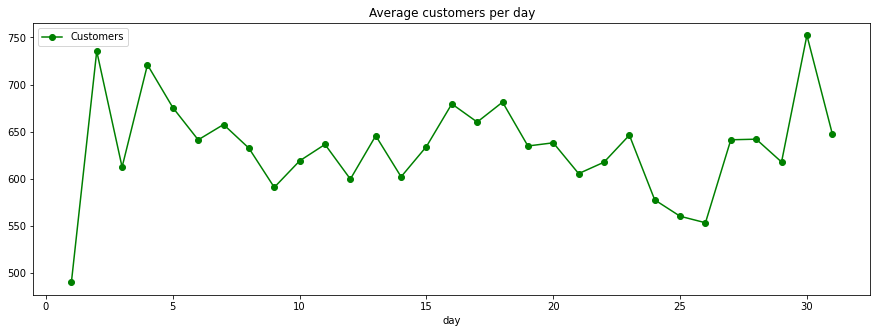

In [35]:
#Take a look at the average sales and no of customers per day
axis = sales_train_merged.groupby('day')[['Customers']].mean().plot(figsize=(15,5), marker='o', color = 'g')
axis.set_title('Average customers per day')

#Insight: Same trend as seen in the daily sales above

Text(0.5, 1.0, 'Average sales per day of week')

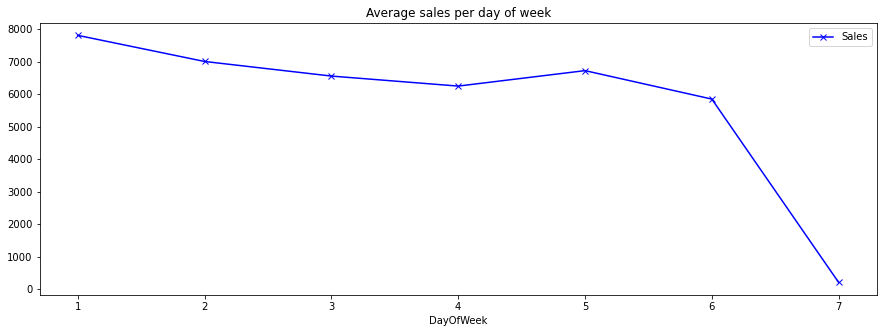

In [36]:
#Visualise the average sales and no of customers per  day of week
axis = sales_train_merged.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(15,5), marker='x', color='b')
axis.set_title('Average sales per day of week')

#Insight:
#Most of the sales happen on Sunday and Monday (Note: 7=Sunday, 1=Monday)

Text(0.5, 1.0, 'Average customers per day of week')

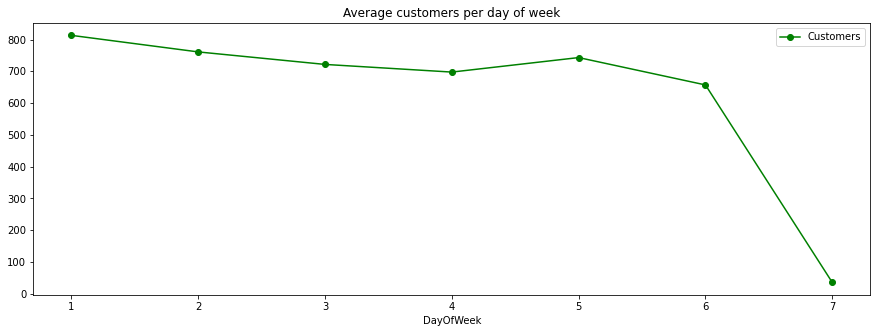

In [37]:
#Take a look at the average sales and no of customers per day of week
axis = sales_train_merged.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(15,5), marker='o', color = 'g')
axis.set_title('Average customers per day of week')

#Insight: Same trend as seen in the daily sales above

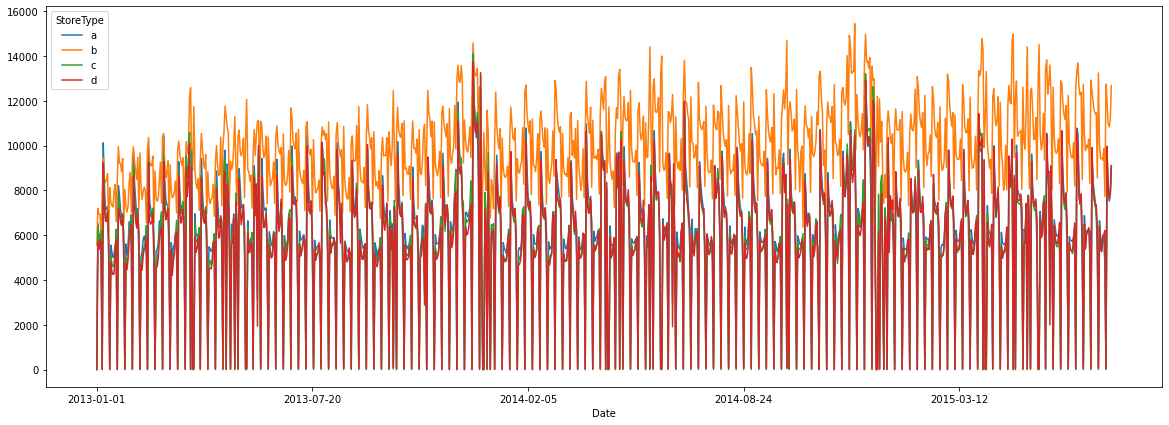

In [38]:
#plot the sales by date and storetype
fig, ax = plt.subplots(figsize = (20,7))
sales_train_merged.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax=ax)

#Insight: Store b seems to have the highest average sales 

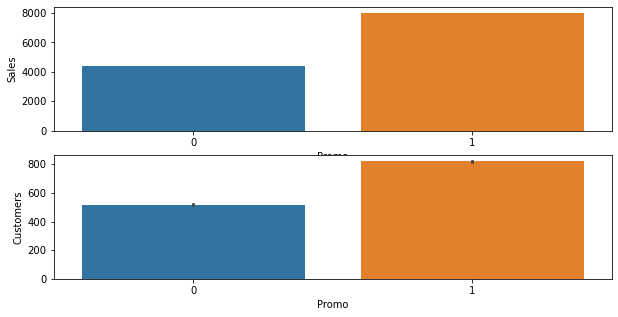

In [39]:
#Let's see if the promo has any effect on sales/customers or not by creating bar plots

#Define the figure size
plt.figure(figsize = (10,5))

#Define the sub-plots (no of rows=2 and columns=1, current variable = 1/sales)
plt.subplot(211)
#Add the parameters to plot
sns.barplot(x='Promo', y = 'Sales', data=sales_train_merged)

#Define the sub-plots (no of rows=2 and columns=1, current variable = 2/customers)
plt.subplot(212)
#Add the parameters to plot
sns.barplot(x='Promo', y='Customers', data = sales_train_merged)

#Insight: When promo is running the sales as well as the customers increases

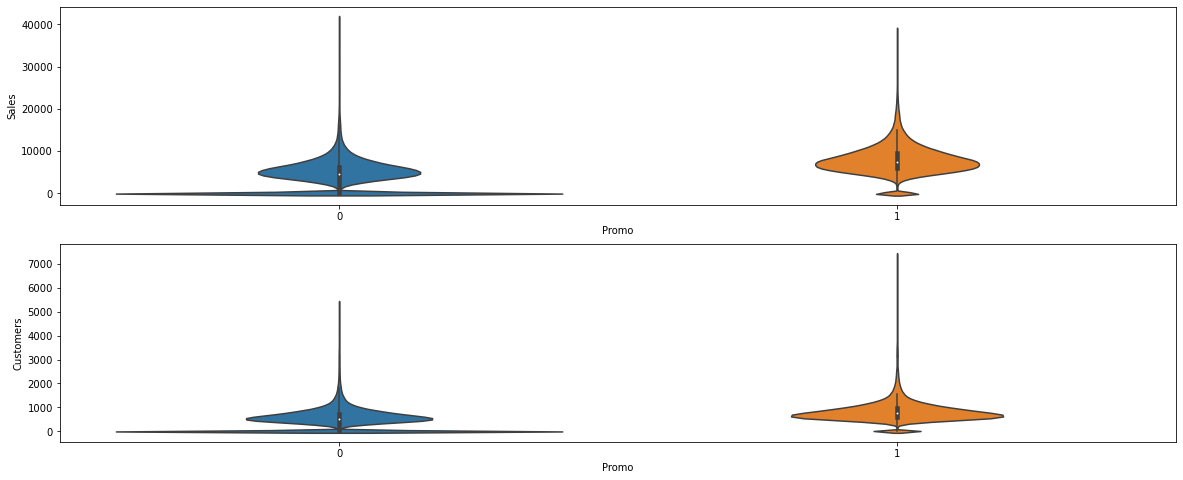

In [40]:
#Take the same data as above and create a violin plot
plt.figure(figsize = (20,8))

#Define subplots
plt.subplot(211)
#Add the parameters to plot
sns.violinplot(x='Promo', y = 'Sales', data = sales_train_merged)

#Define subplots
plt.subplot(212)
#Add the parameters to plot
sns.violinplot(x='Promo', y='Customers', data=sales_train_merged)

## ***Train the model using Facebook Prophet***

In [41]:
#Install facebook prophet
!pip install fbprophet

#Call the prophet library
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [42]:
#In order to apply fb prophet you need to rename the date col to 'ds' and sales/target variable name to 'y'
#Create a user defined function to pass a specific store id, sales data frame and periods and get the sales data subset

#Define the function which takes store id, sales df and periods
def sales_predictions(Store_ID, sales_df, periods):
    
    #Extract the store ID from the original store dataset
    sales_df = sales_df[sales_df['Store']==Store_ID]
    #Rename the sales col as 'y' and date col as 'ds'
    sales_df = sales_df[['Date', 'Sales']].rename(columns ={'Date': 'ds', 'Sales':'y'})
    #Sort the sales value by date (from oldest to latest)
    sales_df = sales_df.sort_values('ds')
    
    #instansiate an object from prophet and fit the model
    model = Prophet()
    model.fit(sales_df)
    #create a future df to forecast and make predictions and provide the periods for which you want to predict
    future_df = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future_df)
    #plot the future time series forecast
    figure = model.plot(forecast, xlabel = 'Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)
    


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


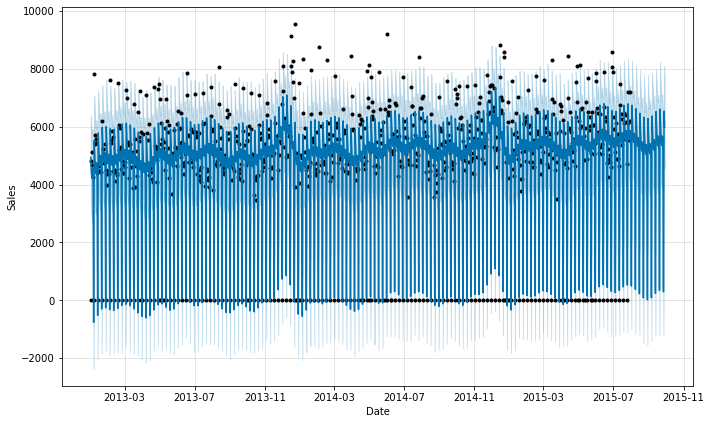

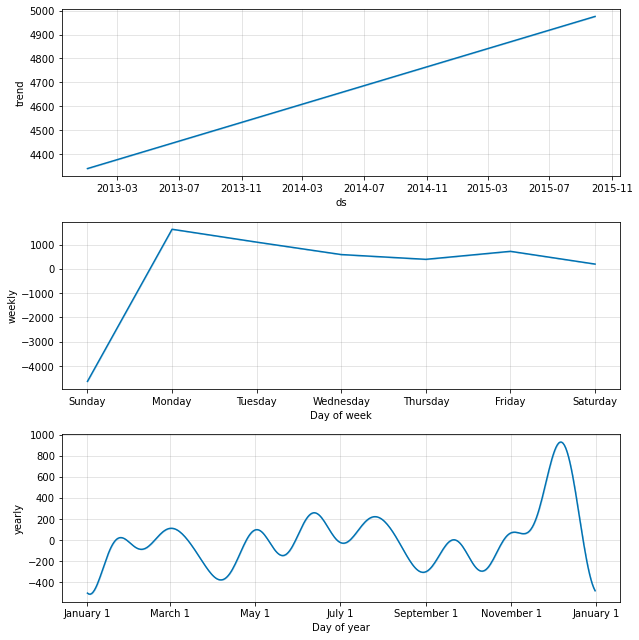

In [43]:
#Call the user defined function to see the results - predict for store no =10, period = 60
sales_predictions(10, sales_train_merged, 60)

#Insight:
#All the black dots in the chart are our historical data untill 2015-07
#After 2015-07 there are no black dots which indicates these are sales predictions
#The light blue shades on top and below the forecasted lines mean the upper and lower bounds of sales
#The other charts below show the upward trend of sales, weekly and yearly sales trends

## ***Train the model using Facebook Prophet after introducing seasonality/holidays***

In [110]:
#Define the function which takes store id, sales df and periods
#Here we will add school holidays and public holidays to the model and predict the sales 

def sales_predictions(Store_ID, sales_df, holidays, periods):
    
    #Extract the store ID from the original store dataset
    sales_df = sales_df[sales_df['Store']==Store_ID]
    #Rename the sales col as 'y' and date col as 'ds'
    sales_df = sales_df[['Date', 'Sales']].rename(columns ={'Date': 'ds', 'Sales':'y'})
    #Sort the sales value by date (from oldest to latest)
    sales_df = sales_df.sort_values('ds')
    
    #instansiate an object from prophet and fit the model (add holidays while calling Prophet)
    model = Prophet(holidays=holidays)
    model.fit(sales_df)
    #create a future df to forecast and make predictions and provide the periods for which you want to predict
    future_df = model.make_future_dataframe(periods = periods)
    forecast = model.predict(future_df)
    #plot the future time series forecast
    figure = model.plot(forecast, xlabel = 'Date', ylabel='Sales')
    figure2 = model.plot_components(forecast)
    

In [99]:
#Get all the dates pertaining to school holidays (as we need an array of dates, that is why we use .values at the end)
school_holidays = sales_train_merged[sales_train_merged['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-03',
       '2013-01-02', '2013-01-01'], dtype=object)

In [100]:
#check the shape of school holidays df
school_holidays.shape


(181721,)

In [85]:
#Get all the dates pertaining to state holidays (as we need an array of dates, that is why we use .values at the end)
state_holidays = sales_train_merged[(sales_train_merged['StateHoliday']=='a') 
                                    | (sales_train_merged['StateHoliday']=='b') 
                                    | (sales_train_merged['StateHoliday']=='c')].loc[:, 'Date'].values
state_holidays

array(['2015-06-04', '2015-05-25', '2015-05-14', ..., '2013-04-01',
       '2013-03-29', '2013-01-01'], dtype=object)

In [86]:
#check the shape of state holidays df
state_holidays.shape

(31050,)

In [101]:
#Now create a data frame or School holidays and state holidays

#Create the State holiday data frame
state_holiday = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                             'holiday': 'state_holiday'})
state_holiday

,ds,holiday
0,2015-06-04,state_holiday
1,2015-05-25,state_holiday
2,2015-05-14,state_holiday
3,2015-05-01,state_holiday
4,2015-04-06,state_holiday
...,...,...
31045,2013-05-09,state_holiday
31046,2013-05-01,state_holiday
31047,2013-04-01,state_holiday
31048,2013-03-29,state_holiday


In [102]:
#Create the School holiday data frame
school_holiday = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                             'holiday': 'school_holiday'})
school_holiday

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
181716,2013-01-05,school_holiday
181717,2013-01-04,school_holiday
181718,2013-01-03,school_holiday
181719,2013-01-02,school_holiday


In [107]:
#concanate both school holiday df and state holiday df
#please ensure to have double brackets after pd.concat
school_state_holidays = pd.concat((school_holiday, state_holiday))
school_state_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
31045,2013-05-09,state_holiday
31046,2013-05-01,state_holiday
31047,2013-04-01,state_holiday
31048,2013-03-29,state_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


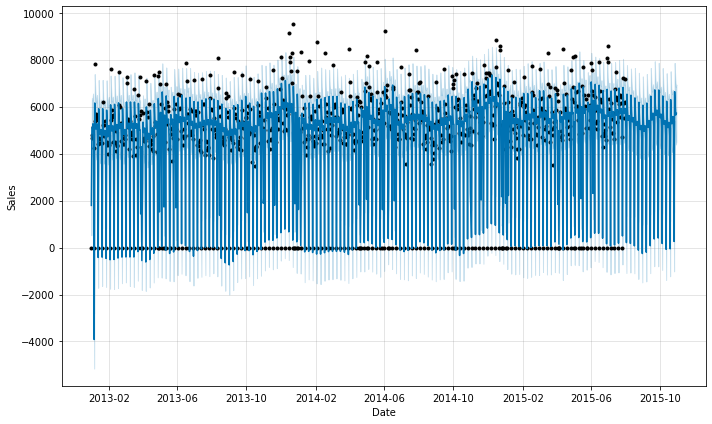

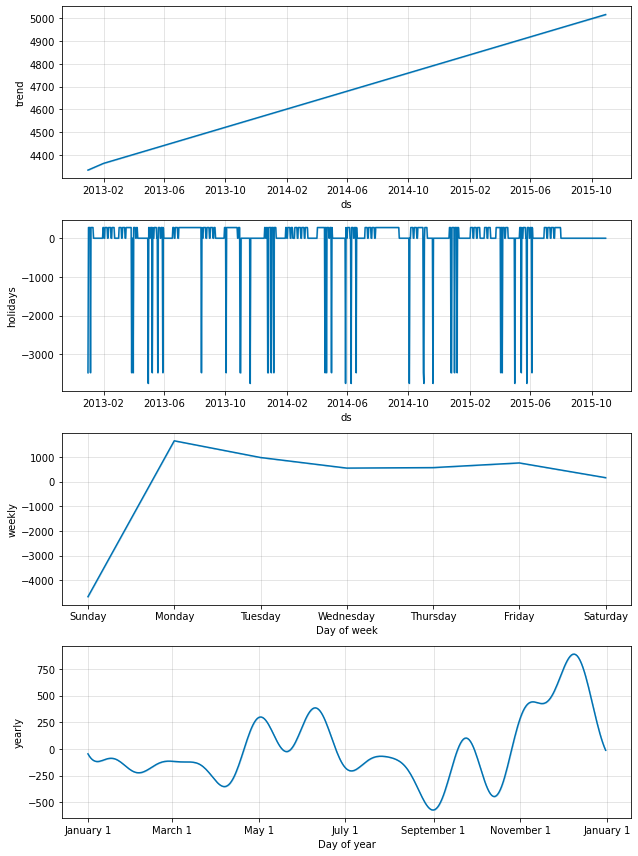

In [111]:
#Let's make predictions using holidays for a specific store
sales_predictions(10, sales_train_merged, school_state_holidays, 90)